In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 1. 데이터 불러오기 및 기본 탐색
# 주어진 주식 데이터 파일을 불러온다.
file_path = "../data/stock_data.csv"  # 실제 데이터 파일 경로
df = pd.read_csv(file_path)


In [3]:
# 데이터의 첫 5행 출력 (EDA의 첫 단계)
print("데이터 미리보기")
df.head()

데이터 미리보기


,Date,Close
0,2023-01-02,99.99
1,2023-01-03,99.72
2,2023-01-04,101.01
3,2023-01-05,104.06
4,2023-01-06,103.59


In [4]:
# 데이터의 기본 정보 확인 (컬럼명, 데이터 타입, 결측값 확인)
print("\n데이터 정보")
df.info()


데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    260 non-null    object 
 1   Close   260 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [6]:
# 2. 필요한 컬럼 선택 및 데이터 변환
# 'Date' (날짜), 'Close' (종가) 컬럼을 선택
df = df[["Date", "Close"]].dropna()  # 날짜 및 종가 데이터가 없는 경우 제거

In [8]:
# 'Date' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])  # 날짜 데이터를 datetime 형식으로 변환
df

,Date,Close
0,2023-01-02,99.99
1,2023-01-03,99.72
2,2023-01-04,101.01
3,2023-01-05,104.06
4,2023-01-06,103.59
...,...,...
255,2023-12-25,99.40
256,2023-12-26,101.94
257,2023-12-27,100.52
258,2023-12-28,101.41


In [9]:
# 날짜 기준으로 정렬
df = df.sort_values(by='Date')
df

,Date,Close
0,2023-01-02,99.99
1,2023-01-03,99.72
2,2023-01-04,101.01
3,2023-01-05,104.06
4,2023-01-06,103.59
...,...,...
255,2023-12-25,99.40
256,2023-12-26,101.94
257,2023-12-27,100.52
258,2023-12-28,101.41


In [10]:
# 3. 이동 평균선 계산 (새로운 컬럼 만들기)
# 단기 이동 평균선 (5일)
df['MA5'] = df['Close'].rolling(window=5).mean()  # 5일 이동 평균선 계산

# 중기 이동 평균선 (20일)
df['MA20'] = df['Close'].rolling(window=20).mean()  #20일 이동 평균선 계산

# 장기 이동 평균선 (60일)
df['MA60'] = df['Close'].rolling(window=60).mean()  # 60일 이동 평균선 계산


In [11]:
# 4. 특정 구간 강조 (이동 평균선이 교차하는 구간)
# 이동 평균선이 교차하는 특정 구간을 찾기 위해, MA5와 MA20의 차이를 계산
df['Crossover'] = df["MA5"] = df["MA20"] # 이동 평균선 차이를 계산하는 코드 작성


In [12]:
# 교차점: MA5가 MA20을 상향 돌파하는 경우 (골든크로스)
golden_cross = df[(df['Crossover'] > 0) & (df['Crossover'].shift(1) < 0)]

In [13]:
# 교차점: MA5가 MA20을 하향 돌파하는 경우 (데드크로스)
death_cross = df[(df['Crossover'] < 0) & (df['Crossover'].shift(1) > 0)]

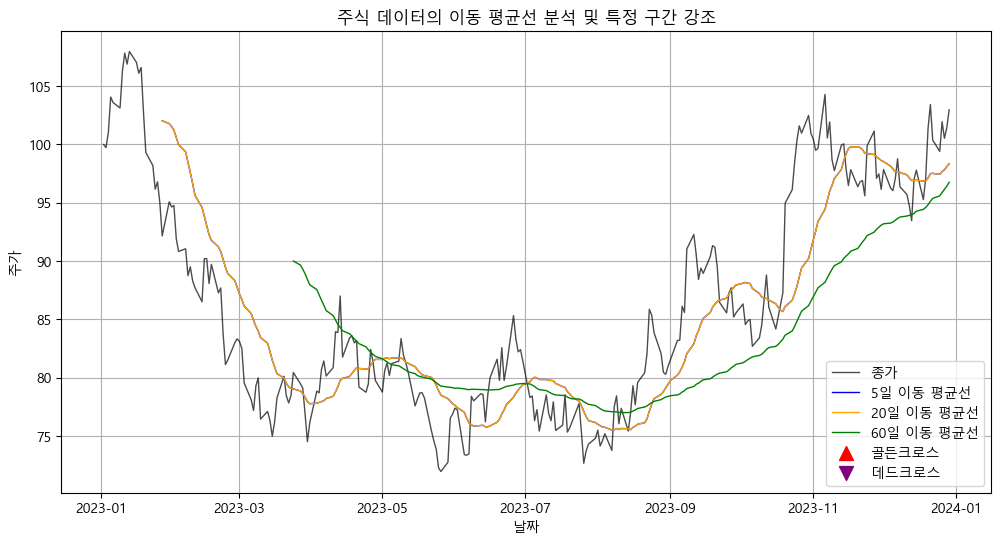

In [14]:
# 5. 데이터 시각화 (이동 평균선 및 특정 구간 강조)
plt.figure(figsize=(12, 6))

# 종가 그래프
plt.plot(df['Date'], df['Close'], label='종가', color='black', linewidth=1, alpha=0.7)

# 이동 평균선 그래프
plt.plot(df['Date'], df['MA5'], label='5일 이동 평균선', color='blue', linewidth=1)
plt.plot(df['Date'], df['MA20'], label='20일 이동 평균선', color='orange', linewidth=1)
plt.plot(df['Date'], df['MA60'], label='60일 이동 평균선', color='green', linewidth=1)

# 골든크로스 지점 강조
plt.scatter(golden_cross['Date'], golden_cross['Close'], color='red', label='골든크로스', marker='^', s=100)

# 데드크로스 지점 강조
plt.scatter(death_cross['Date'], death_cross['Close'], color='purple', label='데드크로스', marker='v', s=100)

# 그래프 제목 및 라벨 설정
plt.title('주식 데이터의 이동 평균선 분석 및 특정 구간 강조')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
# 6. 결과 해석
# 1. 이동 평균선을 통해 주가의 흐름을 파악할 수 있다.
# 2. 5일 이동 평균선이 20일 이동 평균선을 상향 돌파하는 경우(골든크로스)는 상승 신호로 해석된다.
# 3. 반대로, 5일 이동 평균선이 20일 이동 평균선을 하향 돌파하는 경우(데드크로스)는 하락 신호로 해석된다.
# 4. 장기 이동 평균선(60일)을 함께 분석하면 주가의 장기적인 방향성을 이해하는 데 도움을 줄 수 있다.
# 5. 특정 구간에서의 교차점(골든크로스, 데드크로스)을 강조하여 투자 의사 결정을 지원할 수 있다.